In [13]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from dtaidistance import dtw, preprocessing


In [2]:
with open('processed_patients.pickle','rb') as f:
    data = pickle.load(f)
data = data.reset_index().drop_duplicates('patient_id').set_index('patient_id')
data.head()

,Age,Sex,apnea,W%,N1%,N2%,N3%,REM%,SRVAS,PLMS,...,S. PERNAS INQUIETAS,PRIVACAO DE SONO,Parasomnia,RONCOPATIA,Epoches,Epoch,Stage,SpO2,HR,subgroup
patient_id,,,,,,,,,,,,,,,,,,,,,
7-3,31,M,False,25.920,5.220,25.74,30.590,12.530,False,False,...,False,False,False,False,814,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[W, W, W, W, W, W, W, W, W, W, W, W, W, W, W, ...","[95.0, 95.0, 96.0, 95.0, 95.0, 95.0, 95.5, 95....","[75.0, 78.0, 75.0, 74.0, 73.0, 84.0, 77.0, 77....",3
3-3,52,M,False,10.375,8.375,31.13,36.710,13.410,False,False,...,False,False,False,False,824,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[W, W, W, W, W, W, W, W, W, W, W, W, N1, N2, N...","[97.0, 98.0, 96.0, 95.0, 96.0, 97.0, 95.0, 95....","[66.0, 57.0, 58.0, 64.0, 70.0, 61.0, 60.0, 74....",3
10-3,33,M,False,18.470,27.760,22.74,14.070,16.960,False,False,...,False,False,False,False,796,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[W, W, W, W, W, W, W, W, W, W, W, W, W, W, W, ...","[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...","[85.0, 76.0, 78.0, 83.0, 91.0, 90.0, 81.0, 83....",3
6-3,38,M,False,8.790,12.015,37.22,28.315,13.655,False,False,...,False,False,False,False,853,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[W, W, W, W, W, W, N1, N1, W, W, N1, N2, N2, N...","[98.0, 97.0, 97.0, 97.0, 97.0, 97.0, 98.0, 97....","[61.0, 64.0, 62.0, 64.0, 64.0, 64.0, 64.0, 66....",3
8-3,31,M,False,37.600,11.900,20.10,14.300,16.100,False,False,...,False,False,False,False,1000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[W, W, W, W, W, W, W, W, W, W, W, W, W, W, W, ...","[97.0, 97.5, 97.5, 98.0, 98.0, 98.0, 98.0, 97....","[85.0, 80.5, 80.5, 76.0, 79.0, 75.0, 81.0, 91....",3


In [3]:
data[data.apnea].shape,data[~data.apnea].shape

((61, 22), (47, 22))

In [228]:
minlen = apnea.Epoch.apply(len).min()
np.stack(apnea.HR.apply(lambda x: x[:minlen]).values).mean(axis=0)

array([73.47540984, 71.28688525, 74.00819672, 75.06557377, 74.12295082,
       74.14754098, 74.83606557, 73.63934426, 72.13114754, 73.04098361,
       72.2295082 , 74.50819672, 71.83606557, 71.53278689, 71.68032787,
       72.87704918, 71.93442623, 71.30327869, 71.45901639, 71.32786885,
       71.44262295, 71.8442623 , 71.53278689, 70.20491803, 70.89344262,
       70.6557377 , 72.08196721, 71.2295082 , 70.87704918, 70.23770492,
       71.8442623 , 71.07377049, 71.59836066, 71.37704918, 70.97540984,
       70.19672131, 70.36065574, 72.01639344, 71.67213115, 71.06557377,
       70.90163934, 72.42622951, 72.71311475, 71.96721311, 71.59836066,
       71.14754098, 71.86065574, 70.94262295, 71.09016393, 71.53278689,
       71.77868852, 72.47540984, 70.70491803, 70.64754098, 70.68032787,
       70.76229508, 70.19672131, 71.89344262, 71.90983607, 70.8852459 ,
       71.72131148, 71.2295082 , 71.37704918, 71.33606557, 72.22131148,
       70.64754098, 70.68032787, 70.73770492, 70.91803279, 69.97

array([<Axes: title={'center': 'HR'}>, <Axes: title={'center': 'SpO2'}>],
      dtype=object)

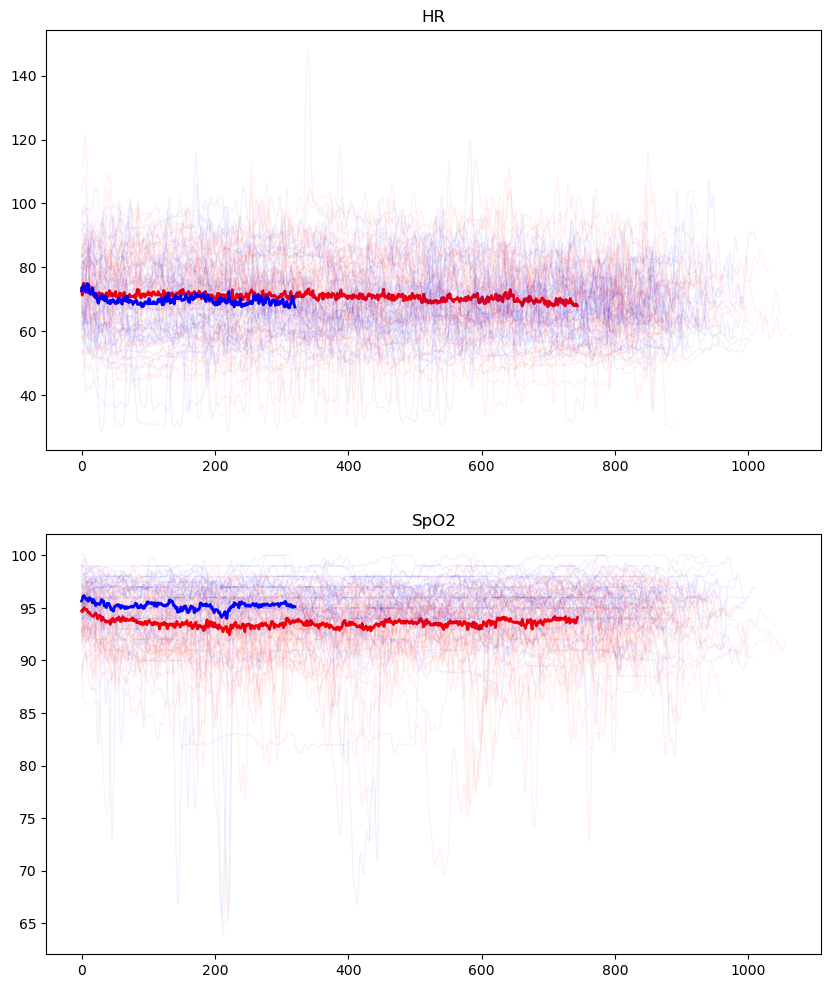

In [21]:
def plot_vitals(df,axes=None,color='blue'):
    if axes is None:
        fig,axes = plt.subplots(2,1,figsize=(15,20))
    plotcols = ['HR','SpO2']
    ii = 0
    
    for i, row in df.iterrows():
        xvals = row.Epoch
        for ax,col in zip(axes,plotcols):
            values = preprocessing.smoothing(row[col],.1)
            # if col == 'HR':
            #     values = np.clip(values,40,130)
            # if col == 'SpO2':
            #     values = np.clip(values,50,100)
            ax.plot(xvals,values,c=color,alpha=.05,linewidth=1)
        ii += 1
    minlen = df.Epoch.apply(len).min()
    avgs = [np.stack(df[col].apply(lambda x: x[0:minlen]).values).mean(axis=0) for col in plotcols]
    for ax,col,avg in zip(axes,plotcols,avgs):
        ax.set_title(col)
        ax.plot(np.arange(0,minlen),avg,c=color,alpha=1,linewidth=2)
    return axes
fig,axes = plt.subplots(2,1,figsize=(10,12))
plot_vitals(data[data.apnea],axes,'red')
plot_vitals(data[~data.apnea],axes,'blue')

In [44]:
def to_threshold(values,threshold):
    return (values <= threshold).mean()

def add_spo2_thresholds(df, thresholds = [i for i in range(80,99)]):
    df = df.copy()
    colnames = []
    for threshold in thresholds:
        name = 'spo2<'+str(threshold)
        df[name] = df.SpO2.apply(lambda x: to_threshold(x,threshold))
        colnames.append(name)
    return df,colnames

def colstats(df,cols=['HR','SpO2']):
    df = df.copy()
    colnames = []
    for col in cols:
        df[col+'_mean'] = df[col].apply(lambda x: np.mean(x))
        df[col+'_std'] = df[col].apply(lambda x: np.std(x))
        colnames.append(col+'_mean')
        colnames.append(col+'_std')
    return df,colnames

temp, spocols = add_spo2_thresholds(data)
temp, statcols = colstats(temp)
temp = temp.drop(['HR','Stage','Epoch','SpO2'],axis=1)
temp.head().T


patient_id,7-3,3-3,10-3,6-3,8-3
Age,31,52,33,38,31
Sex,M,M,M,M,M
apnea,False,False,False,False,False
W%,25.92,10.375,18.47,8.79,37.6
N1%,5.22,8.375,27.76,12.015,11.9
N2%,25.74,31.13,22.74,37.22,20.1
N3%,30.59,36.71,14.07,28.315,14.3
REM%,12.53,13.41,16.96,13.655,16.1
SRVAS,False,False,False,False,False
PLMS,False,False,False,False,False


In [53]:
temp=temp.sample(frac=1)

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
stage_cols = ['W%','N1%','N2%','N3%','REM%']
x= temp[spocols + statcols + stage_cols]
y = temp.apnea#(temp.apnea + temp.RONCOPATIA) > 0
xnormalized = (x - x.mean())/x.std()

In [55]:
# skf = StratifiedKFold(n_splits=4)
# skf.get_n_splits(x,y)
clf= tree.DecisionTreeClassifier(max_depth=2)
cross_val_score(clf,x,y,cv=4).mean()
# for i, train_index,test_index in enumerate(skf.split(x,y)):
#     clf.fit(x[train_index],y[train_index])
#     ypred = clf.predict(x[test_index])

0.6944444444444444

[Text(0.5, 0.8333333333333334, 'SpO2_std <= 1.385\ngini = 0.492\nsamples = 100.0%\nvalue = [0.435, 0.565]\nclass = apnea'),
 Text(0.25, 0.5, 'spo2<88 <= 0.001\ngini = 0.391\nsamples = 41.7%\nvalue = [0.733, 0.267]\nclass = no_apnea'),
 Text(0.125, 0.16666666666666666, 'gini = 0.48\nsamples = 27.8%\nvalue = [0.6, 0.4]\nclass = no_apnea'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 13.9%\nvalue = [1.0, 0.0]\nclass = no_apnea'),
 Text(0.75, 0.5, 'spo2<97 <= 0.964\ngini = 0.346\nsamples = 58.3%\nvalue = [0.222, 0.778]\nclass = apnea'),
 Text(0.625, 0.16666666666666666, 'gini = 0.499\nsamples = 19.4%\nvalue = [0.476, 0.524]\nclass = apnea'),
 Text(0.875, 0.16666666666666666, 'gini = 0.172\nsamples = 38.9%\nvalue = [0.095, 0.905]\nclass = apnea')]

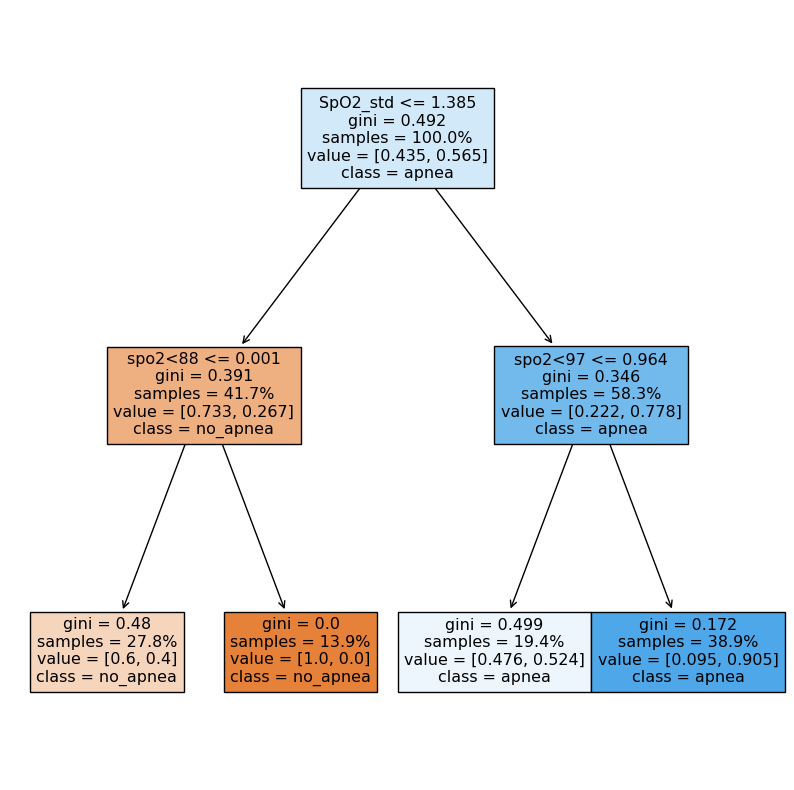

In [56]:
clf = clf.fit(x,y)
tree.plot_tree(clf,feature_names=list(x.columns),filled=True,class_names=['no_apnea','apnea'],proportion=True,ax=plt.subplots(1,1,figsize=(10,10))[1])

In [39]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(penalty='l1',C=.5,solver='saga',max_iter=10000)
cross_val_score(lg,xnormalized,y,cv=4).mean()

0.6203703703703705

<BarContainer object of 28 artists>

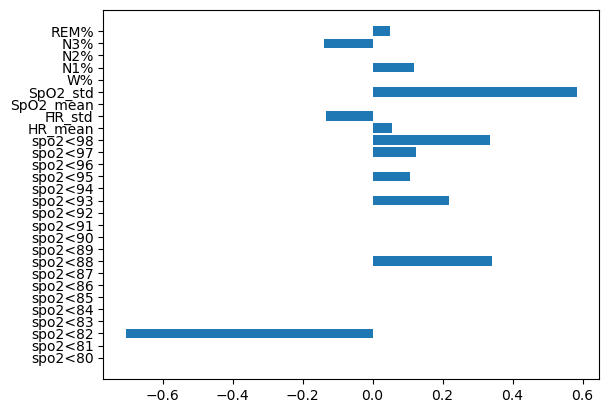

In [40]:
lg.fit(xnormalized,y)
plt.barh([i for i in range(len(x.columns))],lg.coef_.ravel(),tick_label=list(x.columns))

In [41]:
lg2 = LogisticRegression()
cross_val_score(lg2,xnormalized,y,cv=4).mean()

0.5833333333333333

0.6944444444444444


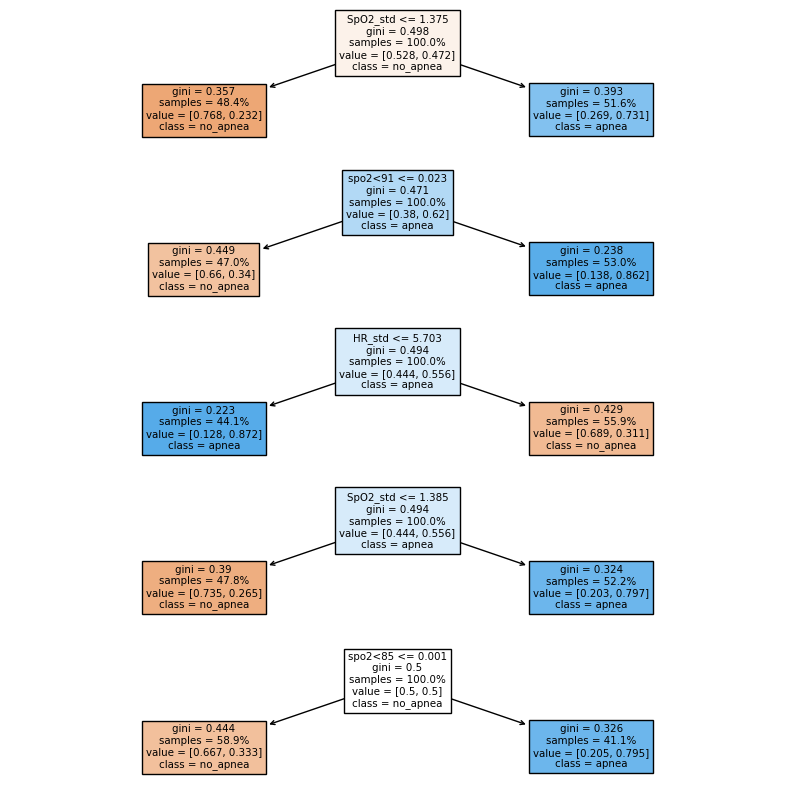

In [62]:
from sklearn.ensemble import RandomForestClassifier
n = 5
rf = RandomForestClassifier(n_estimators=n,max_depth=1,max_features=None)
print(cross_val_score(rf,x,y,cv=4).mean())
rf.fit(x,y)
fig,axes = plt.subplots(n,1,figsize=(10,2*n))
for ax, temptree in zip(axes, rf.estimators_):
    tree.plot_tree(temptree,feature_names=list(x.columns),filled=True,class_names=['no_apnea','apnea'],proportion=True,ax=ax)

In [38]:
rf2 = RandomForestClassifier()
cross_val_score(rf2,x,y).mean()

0.5839826839826838

In [58]:
minlen = 700
temp = data.reset_index().drop_duplicates('patient_id').set_index('patient_id')
temp = temp[temp.SpO2.apply(len) > minlen]
spo2 = np.stack(temp.SpO2.apply(lambda x: x[0:minlen]).values)
hr = np.stack(temp.HR.apply(lambda x: x[0:minlen]).values)
spo2.shape

(107, 700)

In [27]:
spo2_smooth = np.stack(temp.SpO2.apply(lambda x: preprocessing.smoothing(x[0:minlen],.1)).values)
hr_smooth = np.stack(temp.HR.apply(lambda x: preprocessing.smoothing(x[0:minlen],.1)).values)

In [8]:
def dtw_knn(x,y,ks=[5]):
    dm = dtw.distance_matrix_fast(x)
    yp = {kk: [] for kk in ks}
    for i in range(dm.shape[0]):
        dists = np.array([ii if ii != i else 10000 for ii in dm[i] ])
        args = np.argsort(dists)
        for k in ks:
            top = args[0:min(k,len(args))]
            labels = y[top]
            ylist = yp[k]
            ylist.append(np.mean(labels))
            yp[k] = ylist
    return {k: np.array(yy) for k,yy in yp.items()}

In [12]:
ypred_dict = dtw_knn(spo2,temp.apnea.values, ks=[2,3,4,5,6,7,8,9,10])
for k,ypred in ypred_dict.items():
    acc = ((ypred > .5) == temp.apnea.values).mean()
    print(k,acc)

2 0.794392523364486
3 0.8317757009345794
4 0.8037383177570093
5 0.8317757009345794
6 0.7102803738317757
7 0.7570093457943925
8 0.6728971962616822
9 0.7009345794392523
10 0.6915887850467289


In [25]:
ypred_dict = dtw_knn(spo2,(temp.apnea.values + temp.RONCOPATIA.values) > 0, ks=[2,3,4,5,6,7,8,9,10])
for k,ypred in ypred_dict.items():
    acc = ((ypred > .5) == temp.apnea.values).mean()
    print(k,acc)

2 0.7663551401869159
3 0.7289719626168224
4 0.7570093457943925
5 0.7383177570093458
6 0.6915887850467289
7 0.6728971962616822
8 0.6915887850467289
9 0.6728971962616822
10 0.7009345794392523


In [11]:
ypred_dict = dtw_knn(hr-hr.mean(axis=1).reshape(-1,1),temp.apnea.values, ks=[2,3,4,5,6,7,8,9,10])
for k,ypred in ypred_dict.items():
    acc = ((ypred > .5) == temp.apnea.values).mean()
    print(k,acc)

2 0.822429906542056
3 0.7663551401869159
4 0.7383177570093458
5 0.7009345794392523
6 0.7663551401869159
7 0.6915887850467289
8 0.7383177570093458
9 0.6448598130841121
10 0.6635514018691588


In [24]:
ypred_dict = dtw_knn(spo2_smooth,temp.apnea.values, ks=[2,3,4,5,6,7,8,9,10])
for k,ypred in ypred_dict.items():
    acc = ((ypred > .5) == temp.apnea.values).mean()
    print(k,acc)

2 0.8037383177570093
3 0.7757009345794392
4 0.7383177570093458
5 0.7663551401869159
6 0.7383177570093458
7 0.7383177570093458
8 0.7289719626168224
9 0.7476635514018691
10 0.7289719626168224


In [28]:
ypred_dict = dtw_knn(hr_smooth - hr_smooth.mean(axis=1).reshape(-1,1),temp.apnea.values, ks=[2,3,4,5,6,7,8,9,10])
for k,ypred in ypred_dict.items():
    acc = ((ypred > .5) == temp.apnea.values).mean()
    print(k,acc)

2 0.8317757009345794
3 0.7663551401869159
4 0.7289719626168224
5 0.6635514018691588
6 0.6355140186915887
7 0.6542056074766355
8 0.6915887850467289
9 0.6448598130841121
10 0.6635514018691588


In [60]:
ypred_dict = dtw_knn(hr,((temp.apnea.values + temp.RONCOPATIA.values) > 0).astype(int), ks=[2,3,4,5,6,7,8,9,10])
for k,ypred in ypred_dict.items():
    acc = ((ypred > .5) == temp.apnea.values).mean()
    print(k,acc)

2 0.7850467289719626
3 0.6542056074766355
4 0.6728971962616822
5 0.6448598130841121
6 0.6542056074766355
7 0.6355140186915887
8 0.6355140186915887
9 0.6074766355140186
10 0.6074766355140186
